In [1]:
import sys
sys.path.insert(1, "games/")
sys.path.insert(1, "networks/")
from tic_tac_toe import TicTacToe
from tic_tac_toe_net import create_network

from model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/network_tic_tac_toe.h5")

2021-12-02 15:02:02.543190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 15:02:02.588275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 15:02:02.588531: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 15:02:02.589450: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 128)    384         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 128)   512         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 128)    0           ['batch_normaliza

In [3]:
state = game.get_init_state()
model.predict(state)

2021-12-02 15:02:05.142498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([9.99961853e-01, 6.42886926e-06, 9.89208502e-07, 5.11416971e-08,
        7.10850543e-08, 4.65621719e-09, 3.04398964e-05, 1.09843626e-07,
        1.91530223e-08], dtype=float32),
 0.90357184)

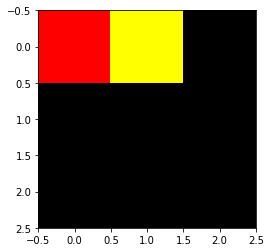

Model prediction: (array([9.46328385e-07, 6.14231706e-01, 4.38112058e-02, 4.37806956e-02,
       1.24819115e-01, 4.34304178e-02, 4.28619757e-02, 4.35392670e-02,
       4.35246862e-02], dtype=float32), -0.8999069)
Root value: -0.9948872415224711


ValueError: invalid literal for int() with base 10: ''

In [9]:
state = game.get_init_state()
state = game.get_new_state(state, 0)
game.play_vs(model, state, 25)